In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_mldata


In [3]:
# MNIST
mnist = fetch_mldata('MNIST original', data_home='./dataset/')

In [4]:
type(mnist)

sklearn.utils.Bunch

In [5]:
# 特徴量とターゲットに分割
X, y = mnist['data'], mnist['target']

In [6]:
X.shape, y.shape

((70000, 784), (70000,))

In [7]:
test_number_image = X[32343].reshape(28, 28)

In [8]:
test_number_image.shape

(28, 28)

In [9]:
# データフレームに変換
test_number_matrix = pd.DataFrame(test_number_image)

pd.options.display.max_columns = 28

test_number_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,59,39,0,0,0,0,0,0,0,0,0,54,76,0,0
8,0,0,0,0,0,0,0,0,0,0,2,62,222,246,238,222,183,215,222,222,176,194,204,222,244,253,0,0
9,0,0,0,0,0,0,0,0,0,8,157,253,253,253,253,253,253,253,253,253,253,253,253,253,241,118,0,0


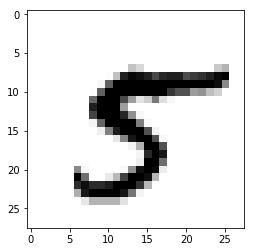

In [10]:
plt.imshow(test_number_image, cmap=matplotlib.cm.binary)
plt.show()

In [11]:
y[32343]

5.0

In [12]:
# 訓練データとテストデータに分割
X_train, X_test = train_test_split(X, test_size=.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=.2, random_state=42)

In [13]:
X_train.shape, X_test.shape

((56000, 784), (14000, 784))

In [14]:
# 訓練データとテストデータを 10,000件に縮小
X_train = X_train[:10000]
y_train = y_train[:10000]

X_test = X_test[:10000]
y_test = y_test[:10000]

In [15]:
X_train.shape, X_test.shape

((10000, 784), (10000, 784))

In [16]:
y_train.shape, y_test.shape

((10000,), (10000,))

In [17]:
# 訓練データのターゲット分布
np.array(np.unique(y_train, return_counts=True)).astype(int)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9],
       [ 970, 1071,  989,  980, 1028,  968,  984, 1047,  963, 1000]])

In [18]:
# 訓練データのターゲット分布
np.array(np.unique(y_train, return_counts=True)).astype(int).T

array([[   0,  970],
       [   1, 1071],
       [   2,  989],
       [   3,  980],
       [   4, 1028],
       [   5,  968],
       [   6,  984],
       [   7, 1047],
       [   8,  963],
       [   9, 1000]])

In [19]:
# 訓練データのターゲット分布
np.array(np.unique(y_test, return_counts=True)).astype(int)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9],
       [ 982, 1124,  999, 1008,  928,  919, 1032, 1069,  986,  953]])

In [20]:
# 特徴量を正規化（Normalization）
X_train_normal = X_train.astype('float32') / 255
X_test_normal = X_test.astype('float32') / 255